# Budgeting Application

## Project Proposal

Your budget will have to take into account the following:

- Rent
- Food expenses
- Entertainment expenses
- Emergency fund  

You will have to adjust for the following:

- Taxes
- Salary growth
- Inflation (for all expenses)

**Salary and Taxes**  
You just got a new job as an entry-level Data Scientist at a technology company in New York City with a decent starting salary of $85,000 per year.

Unfortunately, after state and local taxes, you can expect to be sending roughly 30% back to the government each year.

You will need to calculate your monthly take home pay after taxes in order to begin budgeting.

In [1]:
# Enter your annual salary
salary = 85000

# Assume a tax rate of 30%
tax_rate = 0.30

# Calculate your salary after taxes
salary_after_taxes = salary * (1-tax_rate)
print("Salary after taxes: " + str(round(salary_after_taxes, 2)))

# Calculate your monthly salary after taxes
monthly_takehome_salary = salary_after_taxes/12
print("Monthly takehome salary: " + str(round(monthly_takehome_salary, 2)))

Salary after taxes: 59500.0
Monthly takehome salary: 4958.33


**Monthly Expenses and Savings**  
In order to make it in New York City, you have decided to split a two-bedroom apartment with a friend. You will have to budget for rent, food and entertainment, but it's also a good idea to allocate an amount for unforeseen expenses each month. This unforeseen expenses budget could be used for anything ranging from new clothes or electronics to doctor appointments.

Set up your monthly budget as follows:

- Rent: \$1200 / month (Includes utilities)
- Food: \$30 / day (On average. Includes groceries and eating out.)
- Entertainment: \$200 / month (Movies, drinks, museums, parties...)
- Unforeseen Expenses: \$250 / month (Stay safe, and don't drop your phone!)  

For this application, assume an average of 30 days per month. Whatever is left after your paying your monthly expenses will go into your savings account each month.

In [2]:
# Enter your monthly rent
monthly_rent = 1200

# Enter your daily food budget
daily_food_budget = 30

# Calculate your monthly food budget assuming 30 days per month
monthly_food_budget = daily_food_budget * 30

# Set your monthly entertainment budget
monthly_entertainment_budget = 200

# Allocate funds for unforeseen expenses, just in case
monthly_unforeseen_expenses = 250

# Next, calculate your total monthly expenses
monthly_expenses = monthly_rent + monthly_food_budget + monthly_entertainment_budget + monthly_unforeseen_expenses
print("Monthly expenses: " + str(round(monthly_expenses, 2)))

# Finally, calculate your monthly take-home savings
monthly_savings = monthly_takehome_salary - monthly_expenses
print("Monthly savings: " + str(round(monthly_savings, 2)))

Monthly expenses: 2550
Monthly savings: 2408.33


**Forecast Salary Growth and Cost of Living**  
Due to both inflation and increased productivity from experience, you can expect your salary to grow at different rates depending on your job. Now, since you are working in a growing an in-demand career field as a Data Scientist, you can assume a steady growth in your annual salary every year based on performance.

You can assume an annual salary growth rate of 5%, which means if you start at \$85,000 per year, you can expect to earn over \$176,000 per year after 15 years. After taxes, assuming your tax rate hasn't changed, that works out to roughly \$125,000 per year, which is not unreasonable for a Data Scientist. In fact, you might even make it to that level in a few years! But just to be safe, you should be conservative with your projections.

For this application, assume all inflation and salary growth happens in smaller increments on a monthly basis instead of just one large increase at the end of each year.

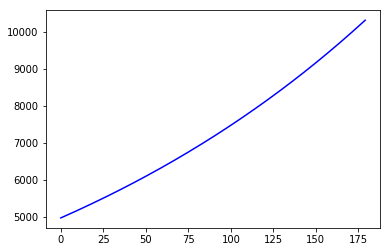

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create monthly forecasts up to 15 years from now
forecast_months = 12*15

# Set your annual salary growth rate
annual_salary_growth = 0.05

# Calculate your equivalent monthly salary growth rate
monthly_salary_growth = (1 + annual_salary_growth)**(1/12) - 1

# Forecast the cumulative growth of your salary
cumulative_salary_growth_forecast = np.cumprod(np.repeat(1 + monthly_salary_growth, forecast_months))

# Calculate the actual salary forecast
salary_forecast = monthly_takehome_salary * cumulative_salary_growth_forecast

# Plot the forecasted salary
plt.plot(salary_forecast, color='blue')
plt.show()

**Forecast Growing Expenses Due to Inflation**  

You will also assume your monthly expenses will rise by an average of 2.5% per year due to inflation. This will lead to higher cost of living over time, paying for the same expenses each year but at a higher price. Luckily, your salary is growing faster than inflation, which means you should have more money going into savings each month.

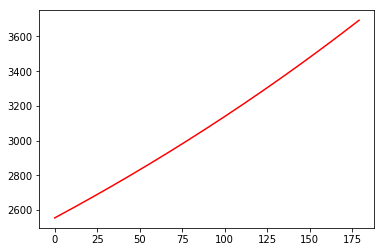

In [8]:
# Create monthly forecasts up to 15 years from now
forecast_months = 12*15

# Set the annual inflation rate
annual_inflation = 0.025

# Calculate the equivalent monthly inflation rate
monthly_inflation = (1+annual_inflation)**(1/12) - 1

# Forecast cumulative inflation over time
cumulative_inflation_forecast = np.cumprod(np.repeat(1+monthly_inflation, forecast_months))

# Calculate your forecasted expenses
expenses_forecast = monthly_expenses * cumulative_inflation_forecast

# Plot the forecasted expenses
plt.plot(expenses_forecast, color='red')
plt.show()

## Net Worth, Savings, and Investing

**Net Worth**  

- Net Worth = Assets - Liabilities = Equity
- This is the basis of modern accounting
- A point in time measurement  

**Calculate Your Net Worth**  
Now that you have forecasted your savings and salary over time, taking into account career progression and inflation, you have constructed a time-series which you can use to calculate your cash flows, just like in Chapter 1.

For this example, all you need to do is subtract your forecasted monthly expenses from your forcasted monthly salary. The remaining cash flow will go straight into your savings account for each month.

You want to project your cumulative savings over time to see how effective your budgeting process will be given your projections.

Your final net worth: 762318.83


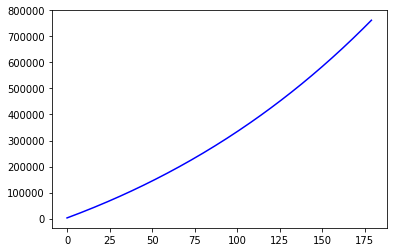

In [9]:
# Calculate your savings for each month
savings_forecast = salary_forecast - expenses_forecast

# Calculate your cumulative savings over time
cumulative_savings = np.cumsum(savings_forecast)

# Print the final cumulative savings after 15 years
final_net_worth = cumulative_savings[-1]
print("Your final net worth: " + str(round(final_net_worth, 2)))

# Plot the forecasted savings
plt.plot(cumulative_savings, color='blue')
plt.show()

**Valuation**  

- NPV(discount rate, cash flows)
- Take into account future cash flows, salary and expenses
- Adjust for inflation

**Reaching Financial Goals**  

- Saving will only earn you a low rate of return
- Inflation will destroy most of your savings over time if you let it
- The best way to combat inflation is to invest

**So You Want to Be a Millionaire?**  
Your projections show that you can accumulate over \$700,000 in just 15 years by following a strict budget and growing your salary steadily over time.

But you want to be a millionaire in 15 years, retire young, sip margaritas and travel for the rest of your life.

In order to do that, you're going to need to invest.

Remember the .pmt() function from numpy? You can use this function to calculate how much you need to save each month in order to accumulate your desired wealth over time.

You still have a lot to learn about the stock market, but your financial advisor told you that you can earn anywhere from 5-10% per year on your capital on average by investing in a low cost index fund.

You know that the stock market doesn't always go up, but you will assume a modest 7% return per year, which has been the average annual return in the US stock market from 1950-2009.

In [11]:
# Forecast out 15 years ahead, 12 months at a time
forecast_months = 15*12

# Set the annual investment return to 7%
investment_rate_annual = 0.07

# Calculate the monthly investment return
investment_rate_monthly = (1+investment_rate_annual)**(1/12) - 1

# Calculate your required monthly investment to amass $1M
required_investment_monthly = np.pmt(rate=investment_rate_monthly, nper=forecast_months, pv=0, fv=-1000000)
print("You will have to invest $" + str(round(required_investment_monthly, 2)) + " per month to amass $1M over 15 years")

You will have to invest $3214.35 per month to amass $1M over 15 years


**Investing a Percentage of Your Income (I)**  
Unfortunately, you really can't afford to save \$3,000 per month in order to amass \$1,000,000 after only 15 years.

But what you can do is start slowly, investing a small percentage of your take-home income each month, which should grow over time as your income grows as well.

In this exercise, you will lay the foundations to simulate this investing process over time.

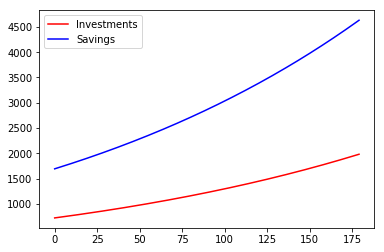

In [16]:
# Calculate your monthly cash flow after expenses
cash_flow_forecast = salary_forecast - expenses_forecast

# Set the percentage of your income to deposit each month
monthly_investment_percentage = 0.30

# Calculate your monthly deposit into your investment account
investment_deposit_forecast = cash_flow_forecast * monthly_investment_percentage

# The rest goes into your savings account
savings_forecast_new = cash_flow_forecast * (1 - monthly_investment_percentage)

# Calculate your cumulative savings over time
cumulative_savings_new = np.cumsum(savings_forecast_new)

# Plot your forecasted monthly savings vs investments
investments_plot, = plt.plot(investment_deposit_forecast, color='red', label="Investments")
savings_plot, = plt.plot(savings_forecast_new, color='blue', label="Savings")
plt.legend(handles=[investments_plot, savings_plot], loc=2)
plt.show()

**Investing a Percentage of Your Income (II)**  

To finish up your investment simulation, you will need to loop through each time period, calculate the growth of any investments you have already made, add your new monthly deposit, and calculate your net worth at each point in time.

You can do it!

Period 0: Current Investment Balance: 726.98 | Savings Account: 1696.3 | Net Worth: 2423.28
Period 1: Current Investment Balance: 1462.59 | Savings Account: 3403.11 | Net Worth: 4865.69
Period 2: Current Investment Balance: 2206.87 | Savings Account: 5120.48 | Net Worth: 7327.36
Period 3: Current Investment Balance: 2959.92 | Savings Account: 6848.47 | Net Worth: 9808.39
Period 4: Current Investment Balance: 3721.79 | Savings Account: 8587.13 | Net Worth: 12308.92
Period 5: Current Investment Balance: 4492.57 | Savings Account: 10336.5 | Net Worth: 14829.06
Period 6: Current Investment Balance: 5272.31 | Savings Account: 12096.64 | Net Worth: 17368.95
Period 7: Current Investment Balance: 6061.1 | Savings Account: 13867.59 | Net Worth: 19928.7
Period 8: Current Investment Balance: 6859.01 | Savings Account: 15649.42 | Net Worth: 22508.44
Period 9: Current Investment Balance: 7666.12 | Savings Account: 17442.17 | Net Worth: 25108.29
Period 10: Current Investment Balance: 8482.49 | Savin

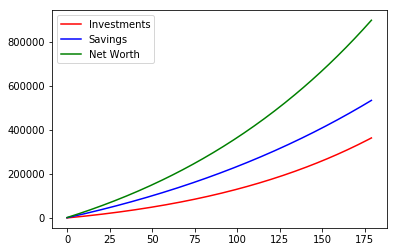

In [17]:
# Initialize the investments array and net worth array
investment_portfolio = np.repeat(0.0, forecast_months)
net_worth = np.repeat(0.0, forecast_months)

# Loop through each forecast period
for i in range(forecast_months):
    
    # Find the previous investment deposit amount
    if i == 0: 
        previous_investment = 0
    else:
        previous_investment = investment_portfolio[i-1]
        
    # Calculate the value of your previous investments, which have grown
    previous_investment_growth = previous_investment*(1 + investment_rate_monthly)
    
    # Add your new deposit to your investment portfolio
    investment_portfolio[i] =  previous_investment_growth + investment_deposit_forecast[i]
    
    # Calculate your net worth at each point in time
    net_worth[i] = investment_portfolio[i] + cumulative_savings_new[i]
    
    # Print the results at each period
    print("Period " + str(i) + ": Current Investment Balance: " + \
          str(round(investment_portfolio[i], 2)) + \
          " | Savings Account: " + str(round(cumulative_savings_new[i], 2)) + \
          " | Net Worth: " + str(round(net_worth[i], 2)) \
         )
         
# Plot your forecasted cumulative savings vs investments and net worth
investments_plot, = plt.plot(investment_portfolio, color='red', label="Investments")
savings_plot, = plt.plot(cumulative_savings_new, color='blue', label = "Savings")
networth_plot, = plt.plot(net_worth, color='green', label = "Net Worth")
plt.legend(handles=[investments_plot,savings_plot,networth_plot], loc=2)
plt.show()

**Inflation-Adjusted Net Worth**  

By saving 30% per year, your simulation shows that you can accumulate $896,962.66. Not quite a millionaire, but not bad at all!

For the sake of simplicity, let's assume you were able to save \$900,000 by following your budget.

But what if you retire 15 years from now? What is \$900,000 going to be truly worth 15 years from now?

In [18]:
# Set your future net worth
future_net_worth = 900000

# Set the annual inflation rate to 2.5%
annual_inflation = 0.025

# Calculate the present value of your terminal wealth over 15 years
inflation_adjusted_net_worth = np.pv(rate=annual_inflation, nper=15, pmt=0, fv=-1*future_net_worth)
print("Your inflation-adjusted net worth: $" + str(round(inflation_adjusted_net_worth, 2)))

Your inflation-adjusted net worth: $621419.0
